### Preparación de los datos para el análisis.

#### Importar librerías.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

#### Cargar datos.

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


#### Optimizar datos.

In [3]:
#Cambiar el nombre de las columnas.
data = data.rename(columns={
    'EventName': 'event',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'event_time',
    'ExpId': 'exp_id'
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event       244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_time  244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
#Comprobar si hay tipos de datos y valores ausentes.
data_nan = data.isnull().sum()
print(data_nan)

event         0
user_id       0
event_time    0
exp_id        0
dtype: int64


In [5]:
#Agrega una columna de fecha y hora y una columna separada para las fechas.
data['event_time'] = pd.to_datetime(data['event_time'], unit='s')
data['date'] = data['event_time'].dt.date.astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_time  244126 non-null  datetime64[ns]
 3   exp_id      244126 non-null  int64         
 4   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [6]:
data.head()

,event,user_id,event_time,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


### Estudiar y comprobar los datos.

#### ¿Cuántos eventos hay en los registros?

In [7]:
num_events = data.shape[0]
print(f"Hay {num_events} eventos en los registros.")

Hay 244126 eventos en los registros.


#### ¿Cuántos usuarios y usuarias hay en los registros?

In [8]:
num_users = data['user_id'].nunique()
print(f"Hay {num_users} usuarios y usuarias en los registros.")

Hay 7551 usuarios y usuarias en los registros.


#### ¿Cuál es el promedio de eventos por usuario?

In [9]:
avg_events_per_user = num_events / num_users
print(f"El promedio de eventos por usuario es {avg_events_per_user:.0f}")

El promedio de eventos por usuario es 32


#### ¿Qué periodo de tiempo cubren los datos?

In [10]:
date_min = data['date'].min().date()
date_max = data['date'].max().date()
print(f"La fecha mínima es {date_min} y la fecha máxima es {date_max}")

La fecha mínima es 2019-07-25 y la fecha máxima es 2019-08-07


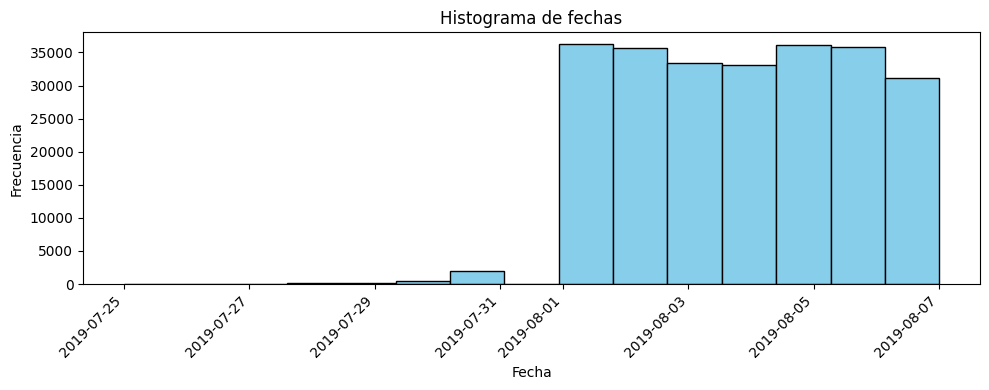

In [11]:
plt.figure(figsize=(10, 4))
plt.hist(data['date'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histograma de fechas')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El histograma sugiere una tendencia de aumento de puntos de datos a medida que pasamos de julio a agosto. Hay una baja frecuencia de puntos de datos para fechas de julio, sobre todo antes de final de mes y muestra un pico significativo en la frecuencia para las fechas de agosto de 2019.

Al crear un nuevo dataframe con los datos del 1 al 7 de agosto, se podrá analizar los datos de manera más confiable y obtener conclusiones más precisas.

In [12]:
new_data = data[(data['date'] >= '2019-08-01') & (data['date'] <= '2019-08-07')]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       241298 non-null  object        
 1   user_id     241298 non-null  int64         
 2   event_time  241298 non-null  datetime64[ns]
 3   exp_id      241298 non-null  int64         
 4   date        241298 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.0+ MB


#### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?


In [13]:
num_events_new_data = new_data.shape[0]
new_num_events = num_events - num_events_new_data
prop_num_events = new_num_events / num_events * 100 
print(f"Se anularon {new_num_events} eventos. Equivalente al {prop_num_events:.2f} % de los registros")

Se anularon 2828 eventos. Equivalente al 1.16 % de los registros


In [14]:
num_users_new_data = new_data['user_id'].nunique()
new_num_users = num_users - num_users_new_data
prop_num_users = new_num_users / num_users * 100
print(f"Se anularon {new_num_users} usuarios y usuarias. Equivalente al {prop_num_users:.2f} % de los registros")

Se anularon 17 usuarios y usuarias. Equivalente al 0.23 % de los registros


No, no hubo perdidas significativas de eventos y usuarios al excluir los datos más antiguos.

#### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [15]:
users_per_group = new_data.groupby('exp_id')['user_id'].nunique().reset_index()
users_per_group.columns = ['exp_id', 'users_count']
print("Usuarios por grupo experimental:")
print(users_per_group)

Usuarios por grupo experimental:
   exp_id  users_count
0     246         2484
1     247         2513
2     248         2537


### Estudiar el embudo de eventos.

#### Identificar y contar los eventos.

In [16]:
event_counts = new_data['event'].value_counts().reset_index()
event_counts.columns = ['event', 'count']
print("Frecuencia de eventos:\n", event_counts)

Frecuencia de eventos:
                      event   count
0         MainScreenAppear  117431
1       OffersScreenAppear   46350
2         CartScreenAppear   42365
3  PaymentScreenSuccessful   34113
4                 Tutorial    1039


#### Usuarios que realizan cada evento.

In [17]:
users_per_event = new_data.groupby('event')['user_id'].nunique().reset_index()
users_per_event.columns = ['event', 'unique_users']

users_per_event = users_per_event.sort_values(by='unique_users', ascending=False).reset_index(drop=True)

# Proporción de usuarios por evento.
total_users = new_data['user_id'].nunique()
users_per_event['proportion'] = users_per_event['unique_users'] / total_users

print("\nUsuarios por evento:\n", users_per_event)


Usuarios por evento:
                      event  unique_users  proportion
0         MainScreenAppear          7419    0.984736
1       OffersScreenAppear          4593    0.609636
2         CartScreenAppear          3734    0.495620
3  PaymentScreenSuccessful          3539    0.469737
4                 Tutorial           840    0.111495


#### Determinar el orden de los eventos.

Ejemplo de orden lógico esperado
- **MainScreenAppear**: El usuario abre la aplicación y aparece la pantalla principal.
- **OffersScreenAppear**: El usuario navega a la pantalla de ofertas.
- **CartScreenAppear**: El usuario agrega algo al carrito y navega a la pantalla del carrito.
- **PaymentScreenSuccessful**: El usuario completa el pago.
- **Tutorial**: El usuario decide ver el tutorial después de completar una compra o en cualquier otro momento.

#### Calcular el embudo de eventos.

In [18]:
users = new_data.pivot_table(
    index='user_id', 
    columns='event', 
    values='event_time',
    aggfunc='min')

step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
step_5 = step_4 & (users['Tutorial'] > users['PaymentScreenSuccessful'])

n_main_sa = users[step_1].shape[0]
n_offers_sa = users[step_2].shape[0]
n_cart_sa = users[step_3].shape[0]
n_payment_ss = users[step_4].shape[0]
n_tutorial = users[step_5].shape[0]

print('Visitantes:', n_main_sa)
print('Aparece la pantalla de ofertas:', n_offers_sa)
print('Aparece la pantalla del carro de compras:', n_cart_sa)
print('Aparece la pantalla de pago completo:', n_payment_ss)
print('Tutorial:', n_tutorial)

Visitantes: 7419
Aparece la pantalla de ofertas: 4201
Aparece la pantalla del carro de compras: 1767
Aparece la pantalla de pago completo: 454
Tutorial: 1


In [19]:
# Crear el embudo de eventos
funnel = pd.DataFrame({
    'event': ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial'],
    'users': [n_main_sa, n_offers_sa, n_cart_sa, n_payment_ss, n_tutorial]
})

# Calcular proporciones
funnel['proportion'] = funnel['users'] / n_main_sa
print("\nEmbudo de eventos:\n", funnel)


Embudo de eventos:
                      event  users  proportion
0         MainScreenAppear   7419    1.000000
1       OffersScreenAppear   4201    0.566249
2         CartScreenAppear   1767    0.238172
3  PaymentScreenSuccessful    454    0.061194
4                 Tutorial      1    0.000135


#### Análisis de pérdida de usuarios.

In [20]:
funnel['percentage_lost'] = (funnel['proportion'].shift(1) - funnel['proportion']) * 100
print("\nEmbudo de eventos con pérdidas de usuarios en porcentaje:\n", funnel)


Embudo de eventos con pérdidas de usuarios en porcentaje:
                      event  users  proportion  percentage_lost
0         MainScreenAppear   7419    1.000000              NaN
1       OffersScreenAppear   4201    0.566249        43.375118
2         CartScreenAppear   1767    0.238172        32.807656
3  PaymentScreenSuccessful    454    0.061194        17.697803
4                 Tutorial      1    0.000135         6.105944


La etapa en la que se pierden más usuarios es en la pantalla de ofertas.

#### Calcular el porcentaje de usuarios que completaron todo el viaje.

In [21]:
n_total_users = users.shape[0]
n_users_complete_journey = users[step_5].shape[0]

# Calcular el porcentaje de usuarios que completaron todo el viaje
percentage_complete_journey = (n_users_complete_journey / n_total_users) * 100

print(f'Total de usuarios: {n_total_users}')
print(f'Usuarios que completaron todo el viaje: {n_users_complete_journey}')
print(f'Porcentaje de usuarios que completaron todo el viaje: {percentage_complete_journey:.2f}%')

Total de usuarios: 7534
Usuarios que completaron todo el viaje: 1
Porcentaje de usuarios que completaron todo el viaje: 0.01%


### Estudiar los resultados del experimento

#### ¿Cuántos usuarios y usuarias hay en cada grupo?

In [22]:
print("\nNúmero de usuarios únicos en cada grupo:\n", users_per_group)


Número de usuarios únicos en cada grupo:
    exp_id  users_count
0     246         2484
1     247         2513
2     248         2537


#### Diferencia estadísticamente significativa entre las muestras 246 y 247 (prueba A/A).

In [23]:
# Contar usuarios únicos por evento y grupo experimental
users_per_event_group = new_data.groupby(['exp_id', 'event'])['user_id'].nunique().unstack(fill_value=0)

# verificar datos para los grupos 246 y 247
group_246_events = users_per_event_group.loc[246]
group_247_events = users_per_event_group.loc[247]

# selecciona el evento popular
popular_event = new_data['event'].mode()[0]

# datos para los grupos 246 y 247
group_246_data = new_data[new_data['exp_id'] == 246]
group_247_data = new_data[new_data['exp_id'] == 247]

# cantidad de usuarios que realizaron el evento más popular en cada grupo
users_246_event = group_246_data[group_246_data['event'] == popular_event]['user_id'].nunique()
users_247_event = group_247_data[group_24bm7_data['event'] == popular_event]['user_id'].nunique()

# número total de usuarios en cada grupo
total_users_246 = group_246_data['user_id'].nunique()
total_users_247 = group_247_data['user_id'].nunique()

print("\nDatos de eventos para el grupo 246:\n", group_246_events)
print("\nDatos de eventos para el grupo 247:\n", group_247_events)


Datos de eventos para el grupo 246:
 event
CartScreenAppear           1266
MainScreenAppear           2450
OffersScreenAppear         1542
PaymentScreenSuccessful    1200
Tutorial                    278
Name: 246, dtype: int64

Datos de eventos para el grupo 247:
 event
CartScreenAppear           1238
MainScreenAppear           2476
OffersScreenAppear         1520
PaymentScreenSuccessful    1158
Tutorial                    283
Name: 247, dtype: int64


In [24]:
alpha = .05 # nivel de significación

counts = np.array([users_246_event, users_247_event])
nobs = np.array([total_users_246, total_users_247])

# proporción de éxito
p1 = counts[0]/nobs[0]
p2 = counts[1]/nobs[1]

# proporción de éxito en el dataset unido:
p_combined = (counts[0] + counts[1]) / (nobs[0] + nobs[1])

# la diferencia entre las proporciones de los datasets
difference = p1 - p2

# calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/nobs[0] + 1/nobs[1]))

# establece la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1)
 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")

p-value:  0.7570597232046099
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes


#### Repetir el procedimiento para todos los eventos.

In [25]:
def compare_proportions(group1_data, group2_data, event):
    # cantidad de usuarios que realizaron el evento en cada grupo
    users_group1_event = group1_data[group1_data['event'] == event]['user_id'].nunique()
    users_group2_event = group2_data[group2_data['event'] == event]['user_id'].nunique()

    # número total de usuarios en cada grupo
    total_users_group1 = group1_data['user_id'].nunique()
    total_users_group2 = group2_data['user_id'].nunique()

    # proporción de usuarios que realizaron el evento en cada grupo
    p1 = users_group1_event / total_users_group1
    p2 = users_group2_event / total_users_group2

    # proporción de usuarios que realizaron el evento en el dataset unido
    p_combined = (users_group1_event + users_group2_event) / (total_users_group1 + total_users_group2)

    # diferencia entre las proporciones de los datasets
    difference = p1 - p2

    # estadística Z
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_users_group1 + 1/total_users_group2))

    # p-value
    p_value = (1 - st.norm(0, 1).cdf(abs(z_value))) * 2

    return p1, p2, p_value

In [26]:
alpha = .05

events = new_data['event'].unique()

for event in events:
    p1, p2, p_value = compare_proportions(group_246_data, group_247_data, event)
    print(f"Evento: {event}")
    print(f"Proporción grupo 246: {p1:.2f}")
    print(f"Proporción grupo 247: {p2:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    print()

Evento: Tutorial
Proporción grupo 246: 0.11
Proporción grupo 247: 0.11
p-value: 0.9377
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: MainScreenAppear
Proporción grupo 246: 0.99
Proporción grupo 247: 0.99
p-value: 0.7571
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: OffersScreenAppear
Proporción grupo 246: 0.62
Proporción grupo 247: 0.60
p-value: 0.2481
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: CartScreenAppear
Proporción grupo 246: 0.51
Proporción grupo 247: 0.49
p-value: 0.2288
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: PaymentScreenSuccessful
Proporción grupo 246: 0.48
Proporción grupo 247: 0.46
p-value: 0.1146
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes



#### Grupo 248.

In [27]:
# datos para el grupo 248
group_248_data = new_data[new_data['exp_id'] == 248]

alpha = .05

events = new_data['event'].unique()

for event in events:
    p1, p2, p_value = compare_proportions(group_246_data, group_248_data, event)
    print(f"Evento: {event}")
    print(f"Proporción grupo 246: {p1:.2f}")
    print(f"Proporción grupo 248: {p2:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    print()
    
    p1, p2, p_value = compare_proportions(group_247_data, group_248_data, event)
    print(f"Evento: {event}")
    print(f"Proporción grupo 247: {p1:.2f}")
    print(f"Proporción grupo 248: {p2:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    print()

Evento: Tutorial
Proporción grupo 246: 0.11
Proporción grupo 248: 0.11
p-value: 0.8264
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: Tutorial
Proporción grupo 247: 0.11
Proporción grupo 248: 0.11
p-value: 0.7653
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: MainScreenAppear
Proporción grupo 246: 0.99
Proporción grupo 248: 0.98
p-value: 0.2950
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: MainScreenAppear
Proporción grupo 247: 0.99
Proporción grupo 248: 0.98
p-value: 0.4587
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: OffersScreenAppear
Proporción grupo 246: 0.62
Proporción grupo 248: 0.60
p-value: 0.2084
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: OffersScreenAppear
Proporc

#### Nivel de significación de 0.01

In [28]:
alpha = 0.01

for event in events:
    p1, p2, p_value = compare_proportions(group_246_data, group_248_data, event)
    print(f"Evento: {event}")
    print(f"Proporción grupo 246: {p1:.2f}")
    print(f"Proporción grupo 248: {p2:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    print()

    p1, p2, p_value = compare_proportions(group_247_data, group_248_data, event)
    print(f"Evento: {event}")
    print(f"Proporción grupo 247: {p1:.2f}")
    print(f"Proporción grupo 248: {p2:.2f}")
    print(f"p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    print()

Evento: Tutorial
Proporción grupo 246: 0.11
Proporción grupo 248: 0.11
p-value: 0.8264
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: Tutorial
Proporción grupo 247: 0.11
Proporción grupo 248: 0.11
p-value: 0.7653
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: MainScreenAppear
Proporción grupo 246: 0.99
Proporción grupo 248: 0.98
p-value: 0.2950
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: MainScreenAppear
Proporción grupo 247: 0.99
Proporción grupo 248: 0.98
p-value: 0.4587
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: OffersScreenAppear
Proporción grupo 246: 0.62
Proporción grupo 248: 0.60
p-value: 0.2084
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes

Evento: OffersScreenAppear
Proporc

Con un nivel de significancia más bajo (α = 0.01), se confirmó que ninguna de las diferencias observadas era estadísticamente significativa, lo cual refuerza los resultados anteriores.

En resumen, según los análisis realizados, no hay evidencia suficiente para afirmar que el grupo de prueba 248 difiere significativamente en términos de comportamiento de usuario en comparación con los grupos de control 246 y 247. Esto indica que, desde una perspectiva estadística, los grupos parecen haber sido divididos correctamente y no muestran diferencias notables en cuanto a la realización de eventos clave en la aplicación.